In [102]:
import ipywidgets as widgets

path = widgets.Text(
    value = 'C:\\Users\\inst\\Documents\\GitHub\\image_segmentation\\data\\Fe3S_S08_2um.tiff',
    placeholder='Type something',
    description='File path:',
    disabled=False
)

display(path)


Text(value='C:\\Users\\inst\\Documents\\GitHub\\image_segmentation\\data\\Fe3S_S08_2um.tiff', description='Fil…

In [103]:
%matplotlib inline
import ipyvolume as ipv
import matplotlib.pyplot as plt
from skimage import data, io, filters
import numpy as np

from skimage import data, io, filters
## C:\Users\inst\SynologyDrive\Master\Exp\Hi-am\data\2019-04-10 - Issa - Fe3Si -S08 (unlabelled, green)_2um scan_recon.tiff
stack = io.imread(path.value).T


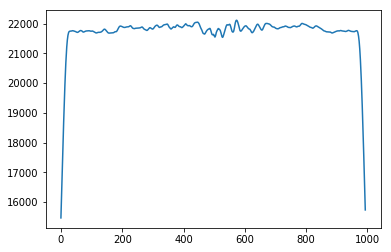

In [104]:
mean_z_intensity = np.mean(stack, axis = (0,1))

fig, ax = plt.subplots()
ax.plot(range(mean_z_intensity.shape[0]), mean_z_intensity)
plt.show()

In [105]:
from rpy2.robjects import FloatVector
from rpy2.robjects.packages import importr

cpt = importr('changepoint')

cpm_result = cpt.multiple_mean_norm(FloatVector(mean_z_intensity),"BinSeg","MBIC",0,2,True,True,1)

change_pts = cpt.cpts(cpm_result)

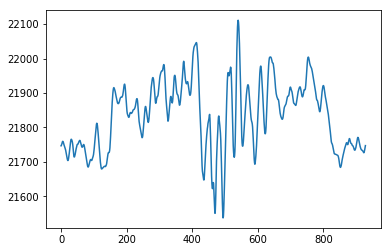

In [106]:
bot = int(change_pts[0])+20
top = int(change_pts[1])-20
cut_warp = mean_z_intensity[bot:top]

fig, ax = plt.subplots()
ax.plot(range(cut_warp.shape[0]), cut_warp)
plt.show()

(-0.5, 1012.5, 991.5, -0.5)

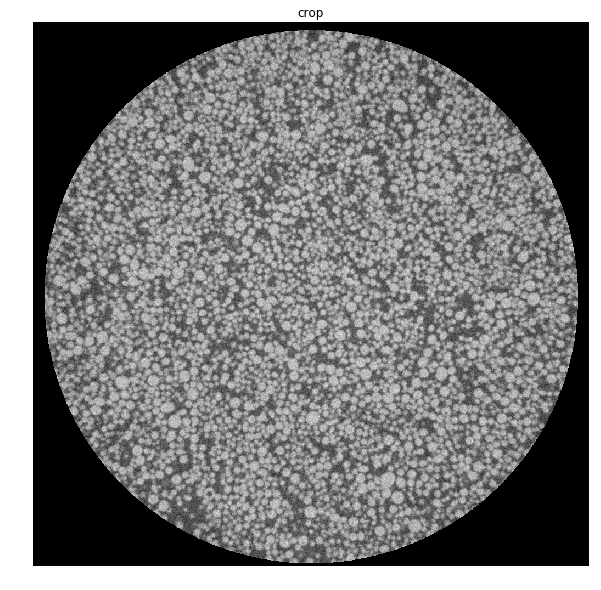

In [107]:
cropped = stack[:,:,bot:top]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cropped[:,:,100], cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('crop')

In [108]:
single_s = cropped[:,:,100]

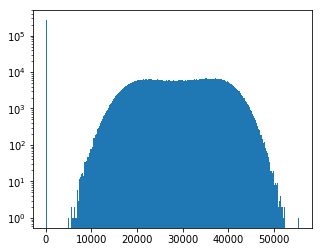

In [109]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.hist(np.ravel(single_s), bins=256)
ax.set_yscale("log", nonposy='clip')


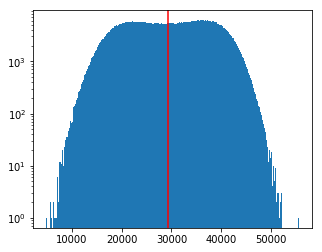

In [111]:
from skimage.filters import threshold_otsu
import numpy.ma as ma

masked = ma.masked_where(single_s == 0, single_s)

thresh = threshold_otsu(masked.compressed())

fig, ax = plt.subplots(figsize=(5, 4))
ax.hist(np.ravel(masked.compressed()), bins=256)
ax.axvline(thresh, color='r')
ax.set_yscale("log", nonposy='clip')


Text(0.5,1,'segmented')

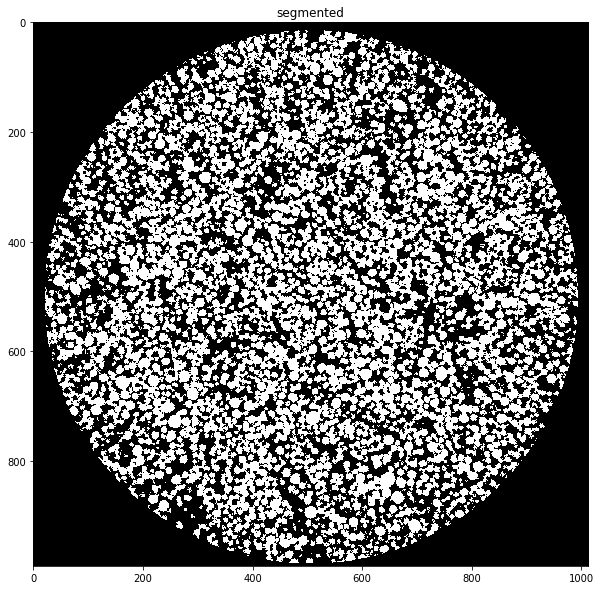

In [113]:
binary = single_s < thresh

single_s[binary] = 0
single_s[~binary] = 255

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(single_s, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('segmented')